### runoff datasets:
This information is from Ming for the calculation of the runoff series
 - CESM: <br>
   /glade/campaign/cgd/cesm/CESM2-LE/lnd/proc/tseries/day_1/QRUNOFF/"b.e21.BHISTcmip6.f09_g17.LE2-1231
                 
 - Livneh dataset: <br>
/glade/p/ral/hap/common_data/LOCA/vic/Livneh_L14_CONUS/ <br>
   runoff.1980.v0.nc ... runoff.2005.v0.nc
   baseflow.1980.v0.nc    ...  baseflow.2005.v0.nc
   
 we use total runoff : runoff + baseflow
     interpolate it to CESM grid
     
     
Livneh "Native" is runoff over CONUS at imported resolution (4km I think)  
Livneh "CESM" is runoff that has been regridded conservatively to match the CESM2 grid.

### MRT updates
Need to aggregate up to HUC basins and then re-calculate the annual maxima series.   
Test the trends in AMAX, find standard deviation, compare Livneh and CESM2
     

# Kernels


In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd

# for creating regions
import regionmask
import geopandas as gpd


# Data

In [2]:
dir_plot = '/glade/u/home/maritye/Plots/PSIF/'
dir_cesm = '/glade/campaign/mmm/c3we/mingge/CESM/'
dir_liv  = '/glade/campaign/mmm/c3we/mingge/LIVNEH/'
dir_out = '/glade/u/home/maritye/PROGS/PSIF-WaterAvail/Data/'

In [28]:
# read in the gridded runoff data from Livneh
# created in ncl from a script by Ming Ge, modified by Mari.
# need to edit all of the names and dimensions and resave thefile!

In [223]:
ds = xr.open_dataset('Data/Livneh_1deg_7Qdaily_1981-2005.nc')
ds

<xarray.Dataset>
Dimensions:           (Time: 9497, lat: 29, lon: 47)
Coordinates:
  * Time              (Time) datetime64[ns] 1980-01-01 1980-01-02 ... 2005-12-31
  * lon               (lon) float64 235.0 236.2 237.5 ... 290.0 291.2 292.5
  * lat               (lat) float64 25.92 26.86 27.8 28.74 ... 50.42 51.36 52.3
Data variables:
    runoff_avg7_cesm  (Time, lat, lon) float32 ...

In [2]:
# Recreate the CESM gridded runoff data
dc = xr.open_dataset('/glade/campaign/mmm/c3we/mingge/CESM/RUNOFF/runoff_runningAvg_1980-2005_daily_CESM.nc')

dc['date'] = pd.to_datetime(pd.Series(dc['date']).astype(str), format='%Y%m%d.0')
dc = dc.set_index(dim_0='date')
dc = dc.rename({'dim_0':'date'})

dr = dc.drop_vars('runoff_avg3') # using only 7day running mean for Livneh so do same with CESM2

# Save file for reuse later
#dr.attrs['Edited'], dr.attrs['Edits'] = 'Mari Tye March 2023', 'Converted to CF-Time'
#dr.to_netcdf(dir_out + 'CESM2_Q7daily_001-010_1981-2005.nc')

In [3]:
dr

<xarray.Dataset>
Dimensions:      (member: 10, lat: 29, lon: 47, date: 9490)
Coordinates:
  * member       (member) int32 1 2 3 4 5 6 7 8 9 10
  * lat          (lat) float32 25.92 26.86 27.8 28.74 ... 49.48 50.42 51.36 52.3
  * lon          (lon) float32 235.0 236.2 237.5 238.8 ... 290.0 291.2 292.5
  * date         (date) datetime64[ns] 1980-01-01 1980-01-02 ... 2005-12-31
Data variables:
    runoff_avg7  (member, date, lat, lon) float32 ...
Attributes:
    description:  from: CESM 10 ensemble members' historical simulation
    script:       Ming Ge: runoff_avg3-7_cesm.ncl

In [238]:
dr = xr.open_dataset(dir_out +'CESM2_7dayRunoff_1981-2005.nc')
drf = xr.open_dataset(dir_out + 'CESM2_7dayRunoff_2040-2070.nc')

In [242]:
drf['lon'] = drf.lon+360

In [3]:
# open shapefile

flnm_shp = '/glade/work/mingge/SHAPEFILES/usgs_hucs/HUC02_conus.shp'
huc2_gdf = gpd.read_file(flnm_shp)


In [4]:
huc2_gdf

,OBJECTID,LoadDate,AreaAcres,AreaSqKm,States,HUC2,Name,str_id,hru_id,geometry
0,2,2012-06-11,2.601081e+07,1.052621e+05,"AL, TN, GA, NC",06,Tennessee Region,TN,6,"POLYGON ((-81.72338 37.24046, -81.72290 37.240..."
1,4,2012-06-11,1.203574e+08,4.870697e+05,"AZ, MX, NM",15,Lower Colorado Region,LCO,15,"POLYGON ((-115.07860 39.30054, -115.07836 39.2..."
2,5,2012-06-11,7.395276e+08,2.992765e+06,CA,18,California Region,CA,18,"MULTIPOLYGON (((-121.63690 43.34029, -121.6371..."
3,6,2012-06-11,1.810547e+08,7.327030e+05,"FL, AL, MS, GA, SC, NC",03,South Atlantic-Gulf Region,SA,3,"POLYGON ((-79.47821 37.50766, -79.47766 37.507..."
4,8,2012-06-11,1.215996e+08,4.920967e+05,"IL, MO, IA, MN, WI",07,Upper Mississippi Region,UM,7,"POLYGON ((-94.32910 47.76904, -94.32969 47.767..."
5,9,2012-06-11,6.832390e+07,2.764972e+05,"LA, TN, MS, KY, AR",08,Lower Mississippi Region,LM,8,"POLYGON ((-90.33322 37.84773, -90.33299 37.847..."
6,10,2012-06-11,5.824078e+07,2.356923e+05,"MN, MT, ND, CN",09,Souris-Red-Rainy Region,RR,9,"MULTIPOLYGON (((-104.31587 50.15139, -104.3146..."
7,11,2012-06-11,3.339566e+08,1.351476e+06,"MO, KS, CO, NE, IA, SD, WY, MT",10,Missouri Region,MR,10,"POLYGON ((-109.31973 49.73911, -109.31955 49.7..."
8,12,2012-06-11,7.258001e+07,2.937211e+05,"NM, CO, AZ, UT, WY",14,Upper Colorado Region,UC,14,"POLYGON ((-110.03805 43.45087, -110.03649 43.4..."
9,13,2012-06-11,1.673852e+09,6.773846e+06,"NV, OR, ID, WY, CA, WA",17,Pacific Northwest Region,PN,17,"POLYGON ((-119.28727 50.63219, -119.28608 50.6..."


In [302]:

# create geopandas regions with names
huc2_regs = regionmask.Regions(huc2_gdf.geometry, 
                                              names=huc2_gdf.hru_id, 
                                              abbrevs=huc2_gdf.str_id, 
                                              name="HUC2"
                                    )

# create geopandas regionmask
conus_mask = regionmask.mask_3D_geopandas(huc2_gdf,
                                          ds.lon,
                                          ds.lat)

conus_mask2 = regionmask.mask_3D_geopandas(huc2_gdf, #lat slightly different in CESM data
                                          dr.lon,
                                          dr.lat)

# now add the region names to the mask
huc2_3d_mask = conus_mask.assign_coords({'regname' : ('region', huc2_gdf.str_id)})
huc2_3d_mask = huc2_3d_mask.swap_dims({'region':'regname'})

### HUC2 Regions
Now aggregate all of the data up to the HUC 2 regions before comparisons and testing trends, etc.

In [303]:
livneh_masked = ds.runoff_avg7_cesm.where(conus_mask)

cesm_c_masked = dr.runoff_avg7.where(conus_mask2)
cesm_f_masked = drf.runoff_avg7.where(conus_mask2)

In [305]:
liv_huc_ts = livneh_masked.groupby('region').sum(['lat','lon'])
cesmc_huc_ts = cesm_c_masked.groupby('region').sum(['lat','lon'])
cesmf_huc_ts = cesm_f_masked.groupby('region').sum(['lat','lon'])

In [11]:
liv_huc_ts = xr.open_dataset(dir_out + 'Q7daily_Livneh_HUC2_1980-2005.nc')
cesmc_huc_ts = xr.open_dataset(dir_out + 'Q7daily_CESM2_001-010_HUC2_1980-2005.nc')
cesmf_huc_ts = xr.open_dataset(dir_out + 'Q7daily_CESM2_001-010_HUC2_2040-2070.nc')

In [327]:
# Calculate annual max and min of CESM2 data. Catchment Totals!

CESM_HUC_7d_AMAX_c = cesmc_huc_ts.groupby('date.year').max(dim='date')
CESM_HUC_7d_AMAX_f = cesmf_huc_ts.groupby('date.year').max(dim='date')
CESM_HUC_7d_AMIN_c = cesmc_huc_ts.groupby('date.year').min(dim='date')
CESM_HUC_7d_AMIN_f = cesmf_huc_ts.groupby('date.year').min(dim='date')


LivHUC_7d_AMAX = liv_huc_ts.groupby('Time.year').max(dim='Time')
LivHUC_7d_AMIN = liv_huc_ts.groupby('Time.year').min(dim='Time')

In [339]:
LivHUC_7d_AMAX.to_netcdf(dir_out + 'Q7MAX_Livneh_HUC2_1980-2005.nc')
LivHUC_7d_AMIN.to_netcdf(dir_out + 'Q7MIN-Livneh_HUC2_1980-2005.nc')

CESM_HUC_7d_AMAX_c.to_netcdf(dir_out + 'Q7MAX_CESM001-010_HUC2_1981-2005.nc')
CESM_HUC_7d_AMAX_f.to_netcdf(dir_out + 'Q7MAX_CESM001-010_HUC2_2040-2070.nc')
CESM_HUC_7d_AMIN_c.to_netcdf(dir_out + 'Q7MIN_CESM001-010_HUC2_1981-2005.nc')
CESM_HUC_7d_AMIN_f.to_netcdf(dir_out + 'Q7MIN_CESM001-010_HUC2_2040-2070.nc')

In [4]:
LivHUC_7d_AMAX = xr.open_dataset(dir_out + 'Q7MAX_Livneh_HUC2_1980-2005.nc')
LivHUC_7d_AMIN= xr.open_dataset(dir_out + 'Q7MIN-Livneh_HUC2_1980-2005.nc')

CESM_HUC_7d_AMAX_c= xr.open_dataset(dir_out + 'Q7MAX_CESM001-010_HUC2_1981-2005.nc')
CESM_HUC_7d_AMAX_f= xr.open_dataset(dir_out + 'Q7MAX_CESM001-010_HUC2_2040-2070.nc')
CESM_HUC_7d_AMIN_c= xr.open_dataset(dir_out + 'Q7MIN_CESM001-010_HUC2_1981-2005.nc')
CESM_HUC_7d_AMIN_f= xr.open_dataset(dir_out + 'Q7MIN_CESM001-010_HUC2_2040-2070.nc')

# Analysis of Runoff

In [5]:
cesm7q90 = CESM_HUC_7d_AMAX_c.quantile(q=.9, dim='year')

c7q90 = cesm7q90.mean('member')

In [6]:
cesm7q10 = CESM_HUC_7d_AMIN_c.quantile(q=0.1, dim='year')
c7q10 = cesm7q10.mean('member')

In [ ]:
runoff_liv  = ds_mean_liv_avg7.runoff_max
runoff_cesm = ds_mean_cesm_avg7.runoff_max_wy_3d.mean(dim=('member'))
runoff_dif  = runoff_cesm - runoff_liv

fig = plt.figure(figsize=(12,5), dpi=200) 

#--------- cartography
projection = ccrs.PlateCarree()
ax1 = plt.subplot(1, 3, 1, projection=projection)
ax1.coastlines(linewidths=0.5)
ax1.add_feature(cfeature.OCEAN, facecolor="lightgray")

ax2 = plt.subplot(1, 3, 2, projection=projection)
ax2.coastlines(linewidths=0.5)
ax2.add_feature(cfeature.OCEAN, facecolor="lightgray")

ax3 = plt.subplot(1, 3, 3, projection=projection)
ax3.coastlines(linewidths=0.5)
ax3.add_feature(cfeature.OCEAN, facecolor="lightgray")


#------------ colormaps 
#cmap =  plt.cm.BrBG
cmapd = plt.cm.PuOr

#------------ plots
p1 = runoff_liv.plot(ax=ax1, cmap=cmap, add_colorbar=False)
p2 = runoff_cesm.plot(ax=ax2, cmap=cmap, robust=True, add_colorbar=False)
p3 = runoff_dif.plot(ax=ax3, cmap=cmapd, robust=True, add_colorbar=False);

#------------ titles
ax1.set_title('Observations (Livneh)')
ax2.set_title('CESM')
ax3.set_title('CESM-Livneh')

plt.suptitle('Max of 7-day mean Runoff (1981-2005)', y= 0.7)

#----- legends

cbar_ = plt.colorbar(p1,ax=[ax1,ax2], orientation='horizontal',  extend='both', extendrect=True,
                     extendfrac='auto',
                     shrink=0.5,
                     aspect=20,
                     pad=0.1)
cbar_.set_label(label = 'mm/day',size=10)
#cbar_.set_ticks([0,2,4,6,8,10])
cbar_.ax.tick_params(labelsize=10)


cbar_ = plt.colorbar(p3,ax=ax3, orientation='horizontal',  extend='both', extendrect=True,
                     extendfrac='auto',
                     aspect=20,
                     pad=0.1)
cbar_.set_label(label = 'mm/day', size=10)
#cbar_.set_ticks([-200,-1,0,1,200])
cbar_.ax.tick_params(labelsize=10)



pltnm = dir_plot + 'Max_7daymean_runoff_comparison.png'
plt.savefig(pltnm, bbox_inches='tight')
plt.show();

In [12]:
liv7q90 = LivHUC_7d_AMAX.quantile(q=0.9, dim='year')
liv7q10 = LivHUC_7d_AMIN.quantile(q=0.1, dim='year')

In [13]:
livHUC_7d_TOT = liv_huc_ts.groupby('Time.year').sum(dim='Time')

In [14]:
liv_propmax = LivHUC_7d_AMAX/livHUC_7d_TOT
liv_propmin = LivHUC_7d_AMIN/livHUC_7d_TOT

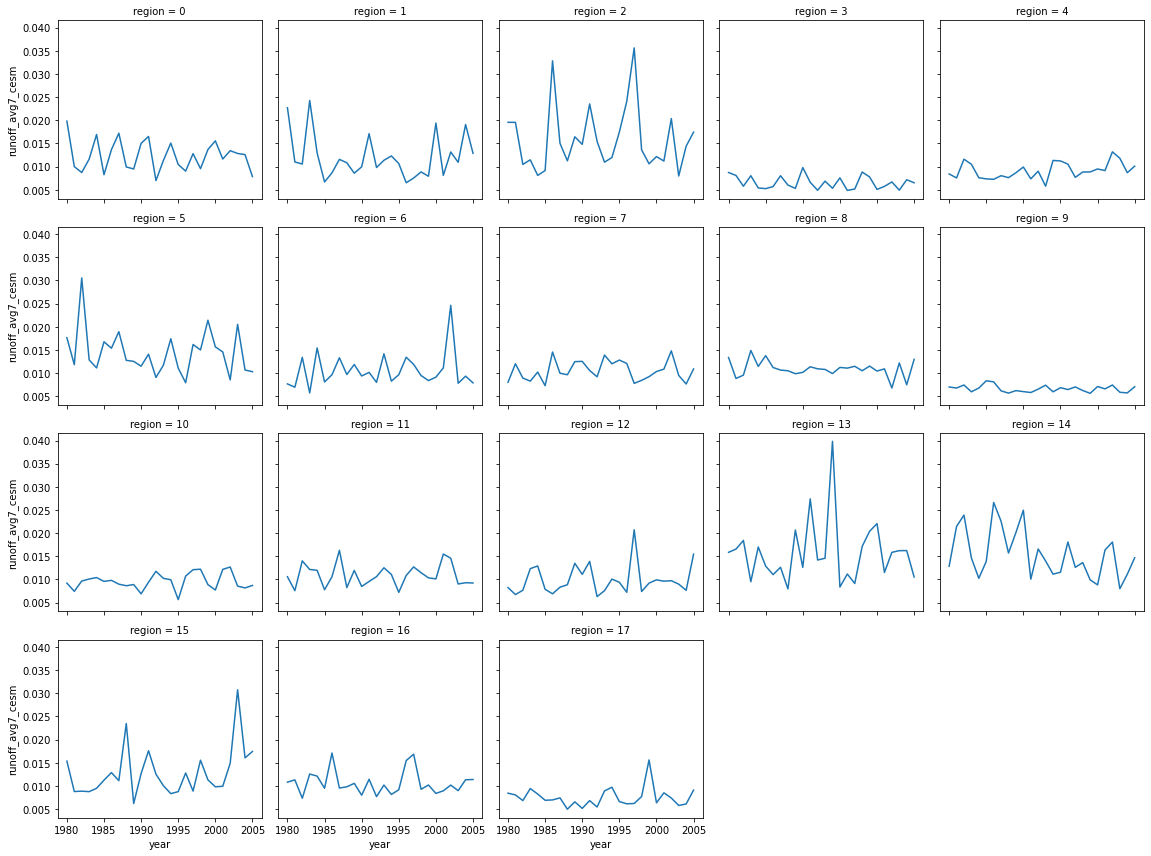

In [386]:
liv_propmax.plot(col='region', col_wrap=5)

In [15]:
cesmHUC_7d_TOT = cesmc_huc_ts.groupby('date.year').sum(dim='date')

In [16]:
cesm_propMax = CESM_HUC_7d_AMAX_c/cesmHUC_7d_TOT

In [17]:
cesm_propMin = CESM_HUC_7d_AMIN_c/cesmHUC_7d_TOT

In [26]:
cesm_propMin

<xarray.Dataset>
Dimensions:      (member: 10, region: 18, year: 26)
Coordinates:
  * member       (member) int32 1 2 3 4 5 6 7 8 9 10
  * region       (region) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17
  * year         (year) int64 1980 1981 1982 1983 1984 ... 2002 2003 2004 2005
Data variables:
    runoff_avg7  (member, year, region) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0

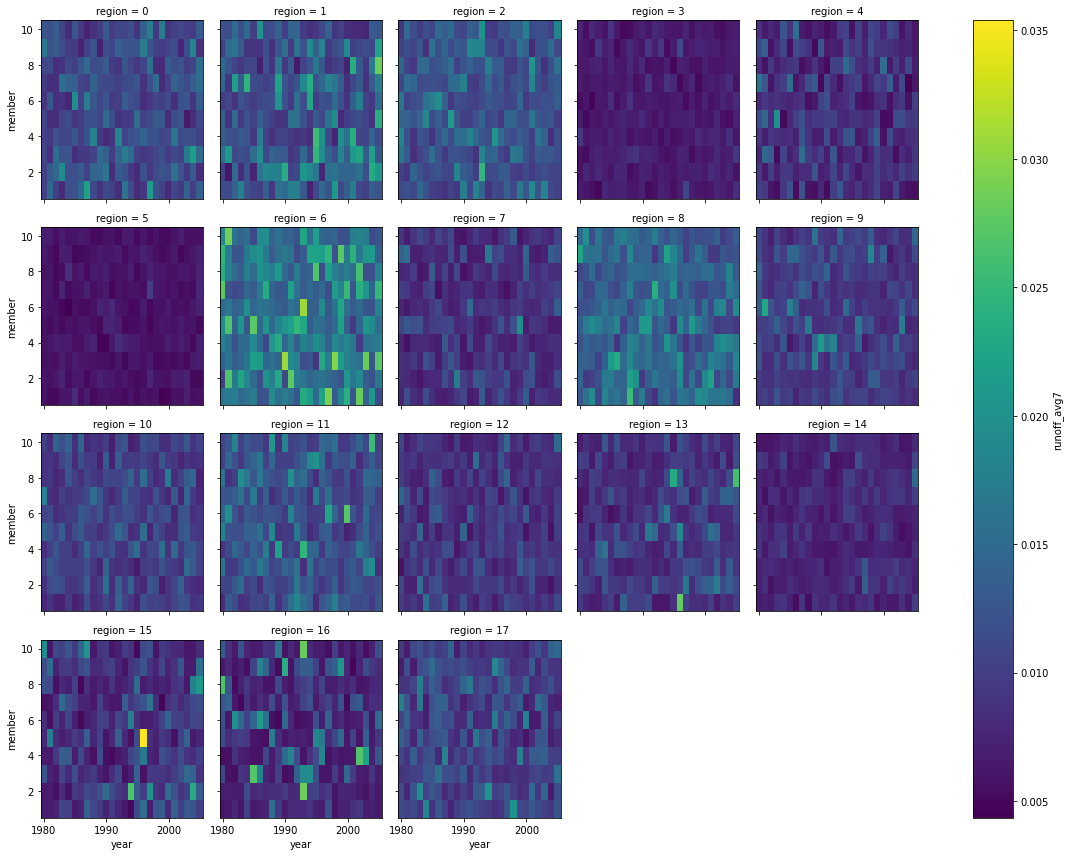

In [390]:
cesm_propMax.plot(col='region', col_wrap=5);

Check frequency of exceeding Q10/Q90, variability among members

In [375]:
xr.where(LivHUC_7d_AMAX >liv7q90, 1, 0).sum(dim='year')

<xarray.DataArray 'runoff_avg7_cesm' (region: 18)>
array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])
Coordinates:
  * region    (region) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17
    quantile  float64 0.9

In [378]:
xr.where(CESM_HUC_7d_AMAX_c > c7q90, 1, 0).sum(dim='year').var('member')

<xarray.DataArray 'runoff_avg7' (region: 18)>
array([1.16, 2.65, 1.8 , 2.8 , 4.84, 2.41, 6.21, 3.25, 2.01, 4.56, 3.89,
       2.21, 1.49, 2.29, 4.61, 2.76, 3.25, 1.29])
Coordinates:
  * region    (region) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17
    quantile  float64 0.9

In [89]:
xr.where(CESM_HUC_7d_AMAX_c > c7q90, 1, 0).sum(dim='year').mean('member').runoff_avg7

<xarray.DataArray 'runoff_avg7' (region: 18)>
array([2.8, 2.5, 3. , 3. , 3.4, 3.3, 3.3, 3.5, 3.3, 2.8, 2.9, 3.3, 3.1,
       3.1, 2.7, 3.2, 3.5, 2.9])
Coordinates:
  * region    (region) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17
    quantile  float64 0.9

In [90]:
xr.where(CESM_HUC_7d_AMAX_f > c7q90, 1, 0).sum(dim='year').mean('member').runoff_avg7

<xarray.DataArray 'runoff_avg7' (region: 18)>
array([5.1, 2. , 2.1, 8.7, 0.6, 4.9, 2.6, 0.4, 0.4, 3.4, 1.2, 1.1, 2.5,
       4.8, 4.4, 2.9, 1.2, 1.5])
Coordinates:
  * region    (region) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17
    quantile  float64 0.9

In [379]:
xr.where(CESM_HUC_7d_AMIN_c < c7q10, 1, 0).sum(dim='year').var('member')

<xarray.DataArray 'runoff_avg7' (region: 18)>
array([0.89, 0.85, 2.24, 1.76, 0.8 , 1.2 , 3.69, 0.89, 0.96, 0.49, 0.4 ,
       4.44, 1.16, 1.36, 1.09, 1.49, 2.41, 0.96])
Coordinates:
  * region    (region) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17
    quantile  float64 0.1

In [380]:
xr.where(CESM_HUC_7d_AMIN_c < c7q10, 1, 0).sum(dim='year').mean('member')

<xarray.DataArray 'runoff_avg7' (region: 18)>
array([3.9, 3.5, 3.6, 3.2, 3. , 3. , 3.9, 2.9, 3.2, 2.9, 3. , 3.4, 2.8,
       3.2, 3.1, 2.9, 3.3, 2.8])
Coordinates:
  * region    (region) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17
    quantile  float64 0.1

In [92]:
xr.where(CESM_HUC_7d_AMIN_f < c7q10, 1, 0).sum(dim='year').mean('member').runoff_avg7

<xarray.DataArray 'runoff_avg7' (region: 18)>
array([5.3, 8.3, 6.3, 2.6, 2.9, 3.4, 8.8, 5.3, 5. , 3.8, 2.2, 2.9, 2.1,
       4.6, 3.8, 6.9, 8. , 3. ])
Coordinates:
  * region    (region) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17
    quantile  float64 0.1

In [94]:
CESM_HUC_7d_AMIN_c.mean(['member','year']).runoff_avg7

<xarray.DataArray 'runoff_avg7' (region: 18)>
array([ 0.13552281,  1.0823394 ,  2.6312912 , 30.797173  , 11.927602  ,
       13.175141  ,  0.12898886,  9.10902   ,  0.3012531 ,  6.7601066 ,
       11.322692  , 12.352956  , 12.51107   ,  4.373227  ,  7.490559  ,
        1.8234615 ,  3.0244215 ,  9.932633  ], dtype=float32)
Coordinates:
  * region   (region) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17

In [93]:
CESM_HUC_7d_AMIN_f.mean(['member','year']).runoff_avg7

<xarray.DataArray 'runoff_avg7' (region: 18)>
array([ 0.14677069,  0.6402327 ,  2.2921486 , 32.346535  , 13.175083  ,
       13.079697  ,  0.06886259,  8.090691  ,  0.19155778,  6.176715  ,
       12.175079  , 13.148496  , 13.770466  ,  3.7726872 ,  6.4113655 ,
        1.0493233 ,  2.3321166 , 10.504381  ], dtype=float32)
Coordinates:
  * region   (region) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17

In [96]:
(CESM_HUC_7d_AMAX_c.mean(['member']).runoff_avg7 - CESM_HUC_7d_AMIN_c.mean(['member']).runoff_avg7).mean('year')

<xarray.DataArray 'runoff_avg7' (region: 18)>
array([ 70.61251 ,  31.171673, 157.38199 , 172.95833 ,  72.98931 ,
        50.52319 ,  22.53517 , 101.29012 ,  55.905746, 341.11948 ,
       244.52295 , 151.27533 , 177.64633 ,  46.702755,  62.521015,
        19.185955,  43.309517, 149.58514 ], dtype=float32)
Coordinates:
  * region   (region) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17

In [98]:
(CESM_HUC_7d_AMAX_f.mean(['member']).runoff_avg7 - CESM_HUC_7d_AMIN_f.mean(['member']).runoff_avg7).mean('year')

<xarray.DataArray 'runoff_avg7' (region: 18)>
array([ 77.00452 ,  30.305817, 148.11531 , 199.8965  ,  52.90896 ,
        54.13336 ,  21.77729 ,  83.188995,  40.475212, 336.45563 ,
       227.55289 , 130.55695 , 167.74393 ,  51.13337 ,  68.159966,
        19.96744 ,  33.14313 , 129.7659  ], dtype=float32)
Coordinates:
  * region   (region) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17

In [97]:
(LivHUC_7d_AMAX.runoff_avg7_cesm - LivHUC_7d_AMIN.runoff_avg7_cesm).mean('year')

<xarray.DataArray 'runoff_avg7_cesm' (region: 18)>
array([ 52.994907,   9.159685, 150.77078 , 144.75658 ,  53.45351 ,
       149.2433  ,  15.56908 ,  68.40477 ,  16.606575, 177.80463 ,
        86.067215,  89.08138 , 109.90675 ,  62.38373 ,  82.79603 ,
        13.145339,  16.943214,  64.685555], dtype=float32)
Coordinates:
  * region   (region) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17

In [54]:
np.sqrt(LivHUC_7d_AMAX.runoff_avg7_cesm.var(dim='year').values)

array([ 23.109879 ,   7.477464 , 101.869514 ,  50.710175 ,  16.888842 ,
        63.11387  ,   7.0776205,  28.135544 ,   7.1666765,  50.23154  ,
        23.772644 ,  25.526285 ,  52.95759  ,  35.45114  ,  36.19062  ,
         5.8109555,  10.309135 ,  25.743494 ], dtype=float32)

In [55]:
np.sqrt(LivHUC_7d_AMIN.runoff_avg7_cesm.var(dim='year').values)

array([0.82141894, 0.19197866, 0.41716012, 8.371377  , 1.7474945 ,
       1.0928138 , 0.49440968, 1.5698287 , 0.24864626, 7.9236836 ,
       2.1732955 , 1.2587429 , 2.3118389 , 0.4900026 , 0.66605455,
       0.24315014, 0.2809148 , 2.4694908 ], dtype=float32)

In [33]:
c7q90.runoff_avg7

<xarray.DataArray 'runoff_avg7' (region: 18)>
array([ 98.68100319,  46.70549583, 233.43246307, 258.61151581,
       122.3195282 ,  80.97446404,  32.96029911, 147.37562141,
        74.71080742, 449.57581024, 330.97883453, 215.17843781,
       260.87647705,  70.65897579,  93.90389519,  29.50183201,
        71.46776199, 220.72033844])
Coordinates:
  * region    (region) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17
    quantile  float64 0.9

In [59]:
np.sqrt(CESM_HUC_7d_AMAX_c.runoff_avg7.var(dim='year').mean(dim='member').values)

array([21.717808 , 11.60281  , 61.30556  , 45.7881   , 31.515747 ,
       14.655332 ,  8.346572 , 30.444387 , 15.307377 , 87.263885 ,
       57.959286 , 39.94201  , 56.4179   , 16.699804 , 18.080553 ,
        7.2665462, 21.070082 , 47.945995 ], dtype=float32)

In [60]:
np.sqrt(CESM_HUC_7d_AMIN_c.runoff_avg7.var(dim='year').mean(dim='member').values)

array([ 0.34726033,  0.74956304,  1.137299  , 11.87375   ,  4.7385383 ,
        5.0861754 ,  0.11648996,  4.191168  ,  0.22905383,  2.640432  ,
        4.257179  ,  4.7350984 ,  4.5421824 ,  2.8385468 ,  4.5282564 ,
        1.3466086 ,  1.2790304 ,  3.6137712 ], dtype=float32)

In [35]:
liv7q90.runoff_avg7_cesm

<xarray.DataArray 'runoff_avg7_cesm' (region: 18)>
array([ 90.52986145,  19.39464855, 323.2401123 , 240.38132477,
        78.24903488, 212.16466522,  24.32090092, 102.97893524,
        27.31501198, 266.4675293 , 122.51624298, 132.43186188,
       187.58690643,  99.13828278, 130.47547913,  22.485322  ,
        33.26323318, 106.45372009])
Coordinates:
  * region    (region) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17
    quantile  float64 0.9

In [43]:
liv7q10.runoff_avg7_cesm

<xarray.DataArray 'runoff_avg7_cesm' (region: 18)>
array([ 2.09838438,  0.52807891,  1.59144723, 24.08060932,  2.07571518,
        3.87956655,  1.03115651,  2.32944489,  0.64993334, 20.62194347,
        6.93365669,  4.07973433,  7.79682446,  1.47312284,  2.17325842,
        0.54293364,  0.65472022,  6.94519663])
Coordinates:
  * region    (region) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17
    quantile  float64 0.1

In [44]:
c7q10.runoff_avg7

<xarray.DataArray 'runoff_avg7' (region: 18)>
array([1.00934251e-04, 3.29993562e-01, 1.34851393e+00, 2.04901245e+01,
       7.91504645e+00, 8.01681864e+00, 1.58876527e-02, 5.18725001e+00,
       9.31474661e-02, 4.36143632e+00, 7.80650489e+00, 8.55731807e+00,
       9.33828063e+00, 1.31993985e+00, 3.18715390e+00, 4.16925981e-01,
       1.83510298e+00, 7.44724205e+00])
Coordinates:
  * region    (region) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17
    quantile  float64 0.1

In [8]:
# Import packages
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.util as cutil
import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm
from matplotlib.ticker import LogFormatter 
import matplotlib.colors as mcolors

#GeoCAT Specific packages
from geocat.viz import util as gvutil
from IPython.display import IFrame
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
#import geoplot as gplt
#import mapclassify as mc


In [9]:
regorder = [11,17,3,10,12,0,4,5,6,7,14,13,15,8,1,16,9,2]
hucname = ['NE', 'MA', 'SA', 'GL', 'OH', 'TN', 'UM', 'LM', 'RR', 'MR', 'ARK','GUL', 'RIO', 'UC', 'LCO', 'GB', 'PN', 'CA']

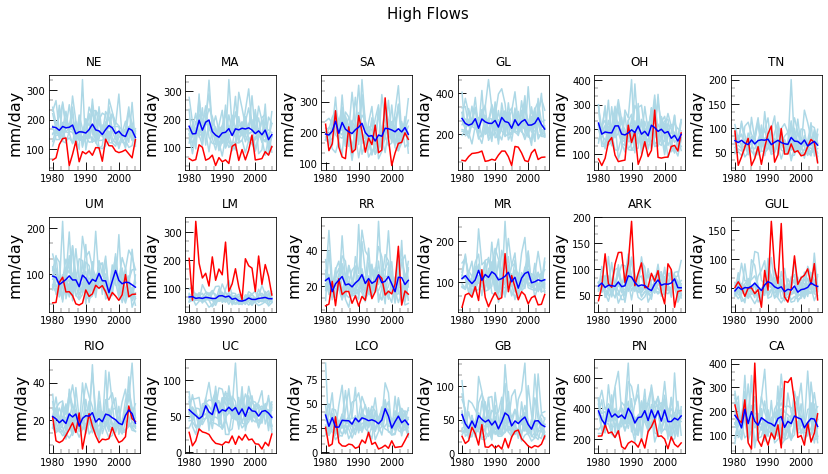

In [400]:
plt.subplots(3,6, figsize=(12,7))
plt.suptitle("High Flows", fontsize=15, y=0.98)
plt.tight_layout(pad=3)
plt.subplots_adjust(hspace=0.5, wspace=0.5)

for n,ireg in enumerate(LivHUC_7d_AMAX.region.isel(region=regorder)):
    # Make regional time series plots
    
    ax1 = plt.subplot(3, 6, n+1)

    # Plot data
    for case in range(1,11):
    # members
        CESM_HUC_7d_AMAX_c.sel(region=ireg).sel(member=case).plot(color='lightblue')
    LivHUC_7d_AMAX.sel(region=ireg).plot(color='red')
    CESM_HUC_7d_AMAX_c.sel(region=ireg).mean('member').plot(color='blue', zorder=2)
    #ax1.set_ylim(0,15)
       # Use geocat.viz.util convenience function to add minor and major tick lines
    gvutil.add_major_minor_ticks(ax1,
                                 x_minor_per_major=4,
                                 labelsize=10)
    ax1.tick_params(direction='in', which='both', right=False, top=False, labelbottom=True)
                        
                    
    # Use geocat.viz.util convenience function to set titles and labels
    gvutil.set_titles_and_labels(ax1, ylabel='mm/day', xlabel='',
                                maintitle=hucname[n], maintitlefontsize=12)


plt.show()

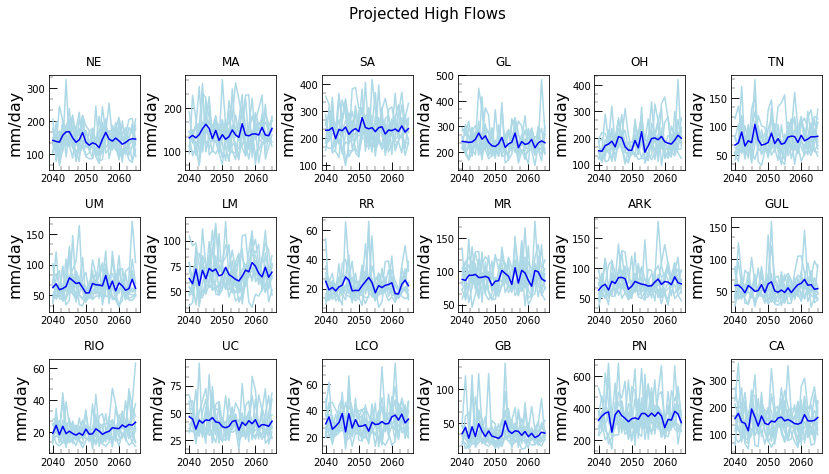

In [102]:
plt.subplots(3,6, figsize=(12,7))
plt.suptitle("Projected High Flows", fontsize=15, y=0.98)
plt.tight_layout(pad=3)
plt.subplots_adjust(hspace=0.5, wspace=0.5)

for n,ireg in enumerate(LivHUC_7d_AMAX.region.isel(region=regorder)):
    # Make regional time series plots
    
    ax1 = plt.subplot(3, 6, n+1)

    # Plot data
    for case in range(1,11):
    # members
        CESM_HUC_7d_AMAX_f.runoff_avg7.sel(region=ireg).sel(member=case).plot(color='lightblue')
    CESM_HUC_7d_AMAX_f.runoff_avg7.sel(region=ireg).mean('member').plot(color='blue', zorder=2)
    #ax1.set_ylim(0,15)
       # Use geocat.viz.util convenience function to add minor and major tick lines
    gvutil.add_major_minor_ticks(ax1,
                                 x_minor_per_major=4,
                                 labelsize=10)
    ax1.tick_params(direction='in', which='both', right=False, top=False, labelbottom=True)
                        
                    
    # Use geocat.viz.util convenience function to set titles and labels
    gvutil.set_titles_and_labels(ax1, ylabel='mm/day', xlabel='',
                                maintitle=hucname[n], maintitlefontsize=12)


plt.show()

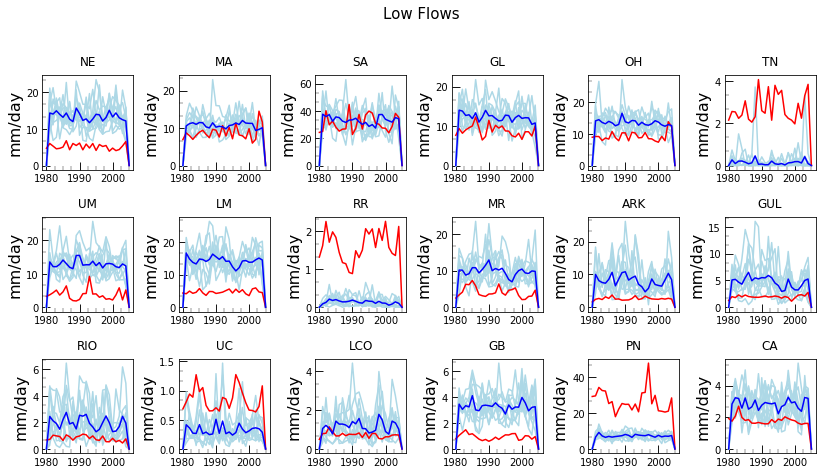

In [401]:
plt.subplots(3,6, figsize=(12,7))
plt.suptitle("Low Flows", fontsize=15, y=0.98)
plt.tight_layout(pad=3)
plt.subplots_adjust(hspace=0.5, wspace=0.5)

for n,ireg in enumerate(LivHUC_7d_AMAX.region.isel(region=regorder)):
    # Make regional time series plots
    
    ax1 = plt.subplot(3, 6, n+1)

    # Plot data
    for case in range(1,11):
    # members
        CESM_HUC_7d_AMIN_c.sel(region=ireg).sel(member=case).plot(color='lightblue')
    LivHUC_7d_AMIN.sel(region=ireg).plot(color='red')
    CESM_HUC_7d_AMIN_c.sel(region=ireg).mean('member').plot(color='blue', zorder=2)
    #ax1.set_ylim(0,15)
       # Use geocat.viz.util convenience function to add minor and major tick lines
    gvutil.add_major_minor_ticks(ax1,
                                 x_minor_per_major=4,
                                 labelsize=10)
    ax1.tick_params(direction='in', which='both', right=False, top=False, labelbottom=True)
                        
                    
    # Use geocat.viz.util convenience function to set titles and labels
    gvutil.set_titles_and_labels(ax1, ylabel='mm/day', xlabel='',
                                maintitle=hucname[n], maintitlefontsize=12)


plt.show()

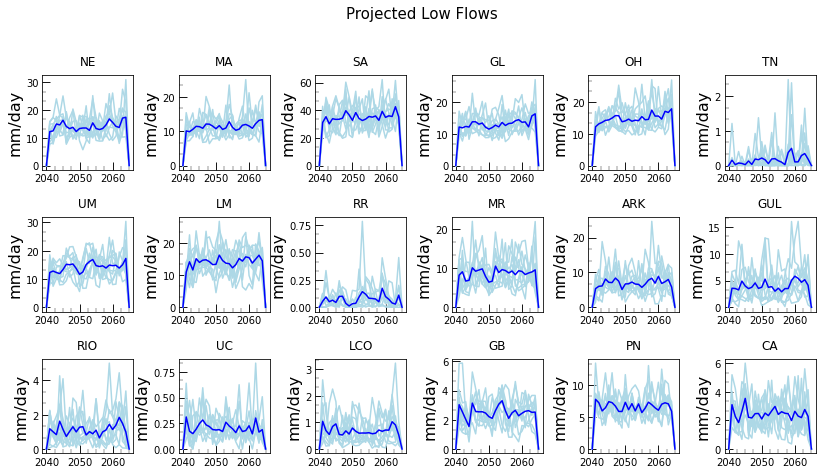

In [101]:
plt.subplots(3,6, figsize=(12,7))
plt.suptitle("Projected Low Flows", fontsize=15, y=0.98)
plt.tight_layout(pad=3)
plt.subplots_adjust(hspace=0.5, wspace=0.5)

for n,ireg in enumerate(LivHUC_7d_AMAX.region.isel(region=regorder)):
    # Make regional time series plots
    
    ax1 = plt.subplot(3, 6, n+1)

    # Plot data
    for case in range(1,11):
    # members
        CESM_HUC_7d_AMIN_f.runoff_avg7.sel(region=ireg).sel(member=case).plot(color='lightblue')
#    CESM_HUC_7d_AMIN_c.runoff_avg7.sel(region=ireg).plot(color='red')
    CESM_HUC_7d_AMIN_f.runoff_avg7.sel(region=ireg).mean('member').plot(color='blue', zorder=2)
    #ax1.set_ylim(0,15)
       # Use geocat.viz.util convenience function to add minor and major tick lines
    gvutil.add_major_minor_ticks(ax1,
                                 x_minor_per_major=4,
                                 labelsize=10)
    ax1.tick_params(direction='in', which='both', right=False, top=False, labelbottom=True)
                        
                    
    # Use geocat.viz.util convenience function to set titles and labels
    gvutil.set_titles_and_labels(ax1, ylabel='mm/day', xlabel='',
                                maintitle=hucname[n], maintitlefontsize=12)


plt.show()

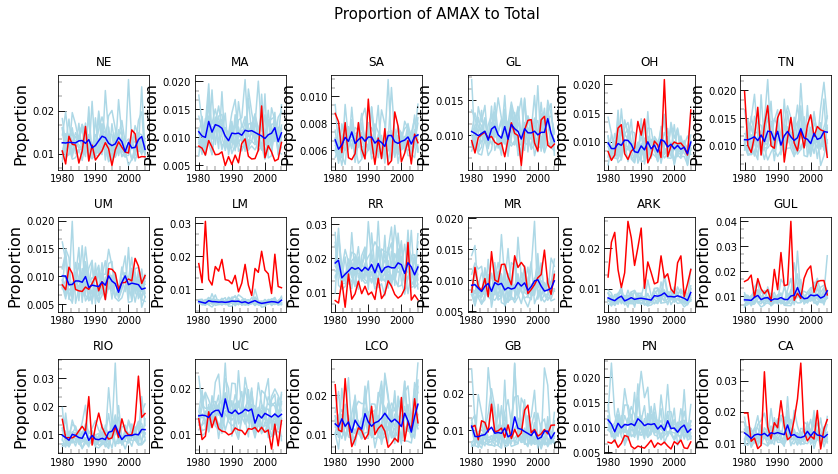

In [402]:
plt.subplots(3,6, figsize=(12,7))
plt.suptitle("Proportion of AMAX to Total", fontsize=15, y=0.98)
plt.tight_layout(pad=3)
plt.subplots_adjust(hspace=0.5, wspace=0.5)

for n,ireg in enumerate(liv_propmax.region.isel(region=regorder)):
    # Make regional time series plots
    
    ax1 = plt.subplot(3, 6, n+1)

    # Plot data
    for case in range(1,11):
    # members
        cesm_propMax.sel(region=ireg).sel(member=case).plot(color='lightblue')
    liv_propmax.sel(region=ireg).plot(color='red')
    cesm_propMax.sel(region=ireg).mean('member').plot(color='blue', zorder=2)
    #ax1.set_ylim(0,15)
       # Use geocat.viz.util convenience function to add minor and major tick lines
    gvutil.add_major_minor_ticks(ax1,
                                 x_minor_per_major=4,
                                 labelsize=10)
    ax1.tick_params(direction='in', which='both', right=False, top=False, labelbottom=True)
                        
                    
    # Use geocat.viz.util convenience function to set titles and labels
    gvutil.set_titles_and_labels(ax1, ylabel='Proportion', xlabel='',
                                maintitle=hucname[n], maintitlefontsize=12)


plt.show()

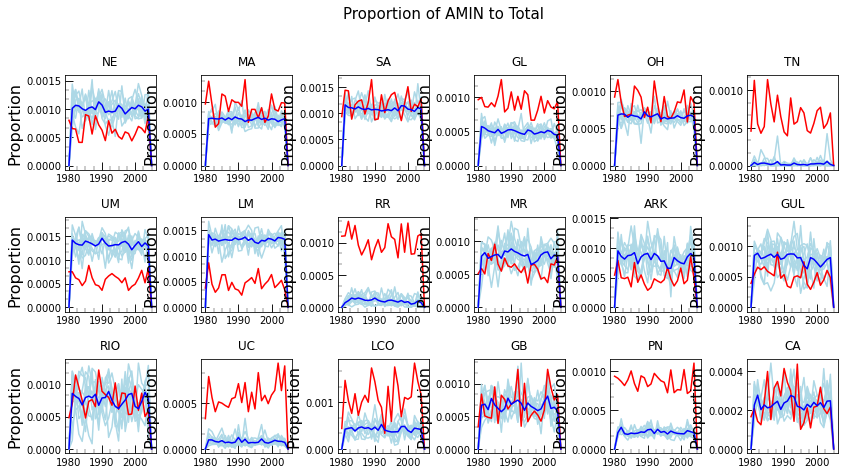

In [31]:
plt.subplots(3,6, figsize=(12,7))
plt.suptitle("Proportion of AMIN to Total", fontsize=15, y=0.98)
plt.tight_layout(pad=3)
plt.subplots_adjust(hspace=0.5, wspace=0.5)

for n,ireg in enumerate(liv_propmin.region.isel(region=regorder)):
    # Make regional time series plots
    
    ax1 = plt.subplot(3, 6, n+1)

    # Plot data
    for case in range(1,11):
    # members
        cesm_propMin.runoff_avg7.sel(region=ireg).sel(member=case).plot(color='lightblue')
    liv_propmin.runoff_avg7_cesm.sel(region=ireg).plot(color='red')
    cesm_propMin.runoff_avg7.sel(region=ireg).mean('member').plot(color='blue', zorder=2)
    #ax1.set_ylim(0,15)
       # Use geocat.viz.util convenience function to add minor and major tick lines
    gvutil.add_major_minor_ticks(ax1,
                                 x_minor_per_major=4,
                                 labelsize=10)
    ax1.tick_params(direction='in', which='both', right=False, top=False, labelbottom=True)
                        
                    
    # Use geocat.viz.util convenience function to set titles and labels
    gvutil.set_titles_and_labels(ax1, ylabel='Proportion', xlabel='',
                                maintitle=hucname[n], maintitlefontsize=12)


plt.show()

In [18]:
liv_qtot = liv_huc_ts.groupby('Time.year').sum('Time')
liv_pard = liv_huc_ts.groupby('Time.year')/liv_qtot
liv_pard_wk = liv_pard.resample(Time='1w').mean()

In [19]:
cesm_qtot = cesmc_huc_ts.groupby('date.year').sum('date')
cesm_pard = cesmc_huc_ts.groupby('date.year')/cesm_qtot
cesm_pard_wk = cesm_pard.resample(date='1w').mean()

fut_qtot = cesmf_huc_ts.groupby('date.year').sum('date')
fut_pard = cesmf_huc_ts.groupby('date.year')/fut_qtot
fut_pard_wk = fut_pard.resample(date='1w').mean()

In [21]:
liv_pard.to_netcdf('Data/Parde_daily_Livneh_HUC2_1980-2005.nc')
cesm_pard.to_netcdf('Data/Parde_daily_CESM001-010_HUC2_1980-2005.nc')
fut_pard.to_netcdf('Data/Parde_daily_CESM001-010_HUC2_2040-2070.nc')

In [22]:
liv_pard

<xarray.Dataset>
Dimensions:           (Time: 9497, region: 18)
Coordinates:
  * Time              (Time) datetime64[ns] 1980-01-01 1980-01-02 ... 2005-12-31
  * region            (region) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17
    year              (Time) int64 1980 1980 1980 1980 ... 2005 2005 2005 2005
Data variables:
    runoff_avg7_cesm  (Time, region) float32 0.001721 0.0005463 ... 0.0 0.0

In [88]:
years = np.arange(1980,2006,1)

dat = [None]*26
for iyr in range(len(years)):
    foo = liv_pard.sel(region=0).sel(Time=str(years[iyr]))
    dat[iyr] = foo.runoff_avg7_cesm.idxmax('Time')
    
dat

[<xarray.DataArray 'Time' ()>
 array('1980-03-23T00:00:00.000000000', dtype='datetime64[ns]')
 Coordinates:
     region   int64 0
     year     int64 1980,
 <xarray.DataArray 'Time' ()>
 array('1981-12-31T00:00:00.000000000', dtype='datetime64[ns]')
 Coordinates:
     region   int64 0
     year     int64 1981,
 <xarray.DataArray 'Time' ()>
 array('1982-02-05T00:00:00.000000000', dtype='datetime64[ns]')
 Coordinates:
     region   int64 0
     year     int64 1982,
 <xarray.DataArray 'Time' ()>
 array('1983-04-08T00:00:00.000000000', dtype='datetime64[ns]')
 Coordinates:
     region   int64 0
     year     int64 1983,
 <xarray.DataArray 'Time' ()>
 array('1984-05-09T00:00:00.000000000', dtype='datetime64[ns]')
 Coordinates:
     region   int64 0
     year     int64 1984,
 <xarray.DataArray 'Time' ()>
 array('1985-02-14T00:00:00.000000000', dtype='datetime64[ns]')
 Coordinates:
     region   int64 0
     year     int64 1985,
 <xarray.DataArray 'Time' ()>
 array('1986-12-11T00:00:00.000000

In [20]:
import matplotlib.dates as mdates

/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/xarray/core/accessor_dt.py:379: FutureWarning: dt.weekofyear and dt.week have been deprecated. Please use dt.isocalendar().week instead.
  FutureWarning,
/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/xarray/core/accessor_dt.py:379: FutureWarning: dt.weekofyear and dt.week have been deprecated. Please use dt.isocalendar().week instead.
  FutureWarning,


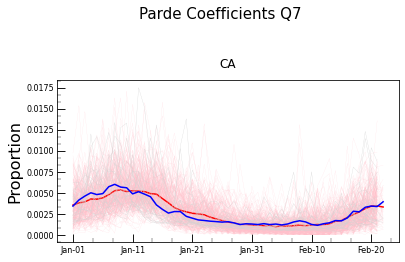

In [129]:
#plt.subplots(3,6, figsize=(12,7))

plt.subplots()
plt.suptitle("Parde Coefficients Q7", fontsize=15, y=0.98)
plt.tight_layout(pad=3)
plt.subplots_adjust(hspace=0.5, wspace=0.5)
year=np.arange(1980,2005,1)

#for n,ireg in enumerate(liv_pard_wk.region.isel(region=regorder)):
for ireg in range(1):
# Make regional time series plots
    
#    ax1 = plt.subplot(3, 6, n+1)
    ax1 = plt.subplot(1,1,1)
    # Plot data
    for case in range(10):
    # members
        for y in range(25):
            t = np.arange(len(cesm_pard_wk.sel(date=str(year[y])).date))
            s = cesm_pard_wk.runoff_avg7.sel(region=ireg).isel(member=case).sel(date=str(year[y]))
            ax1.plot(t,s, color='pink', linewidth=0.1)
            
    foo = cesm_pard_wk.runoff_avg7.groupby('date.week').mean(('member','date')).sel(region=ireg)
    ax1.plot(np.arange(len(foo)),foo,color='red')

    
    # add in individual obs years
    for y in range(25):
        t2 = np.arange(len(liv_pard_wk.sel(Time=str(year[y])).Time))
        m=liv_pard_wk.runoff_avg7_cesm.sel(region=ireg).sel(Time=str(year[y]))
        ax1.plot(t2,m, color='lightgrey', linewidth=0.25, zorder=5)
    l = liv_pard_wk.runoff_avg7_cesm.sel(region=ireg).groupby('Time.week').mean('Time')
    ax1.plot(np.arange(len(l)),l,color='blue', zorder=10)

    # Use geocat.viz.util convenience function to add minor and major tick lines
    gvutil.add_major_minor_ticks(ax1,
   #                              x_minor_per_major=3,
                                 labelsize=8)
    ax1.tick_params(direction='in', which='both', right=False, top=False, labelbottom=True)
#    ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
    #ax1.set_ylim(0,15)
       # Use geocat.viz.util convenience function to add minor and major tick lines
#    gvutil.add_major_minor_ticks(ax1,
#                                 x_minor_per_major=5,
#                                 labelsize=10)
    ax1.tick_params(direction='in', which='both', right=False, top=False, labelbottom=True)
                        
                    
    # Use geocat.viz.util convenience function to set titles and labels
    gvutil.set_titles_and_labels(ax1, ylabel='Proportion', xlabel='',
                                maintitle=hucname[n], maintitlefontsize=12)


plt.show()

/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/xarray/core/accessor_dt.py:379: FutureWarning: dt.weekofyear and dt.week have been deprecated. Please use dt.isocalendar().week instead.
  FutureWarning,
/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/xarray/core/accessor_dt.py:379: FutureWarning: dt.weekofyear and dt.week have been deprecated. Please use dt.isocalendar().week instead.
  FutureWarning,
/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/xarray/core/accessor_dt.py:379: FutureWarning: dt.weekofyear and dt.week have been deprecated. Please use dt.isocalendar().week instead.
  FutureWarning,
/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/xarray/core/accessor_dt.py:379: FutureWarning: dt.weekofyear and dt.week have been deprecated. Please use dt.isocalendar().week instead.
  FutureWarning,
/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-pac

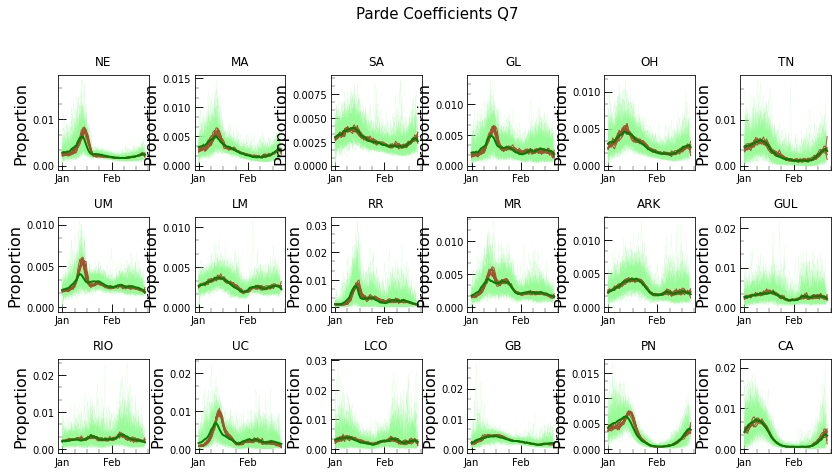

In [82]:
plt.subplots(3,6, figsize=(12,7))
plt.suptitle("Parde Coefficients Q7", fontsize=15, y=0.98)
plt.tight_layout(pad=3)
plt.subplots_adjust(hspace=0.5, wspace=0.5)
year=np.arange(2040,2070,1)

for n,ireg in enumerate(liv_pard_wk.region.isel(region=regorder)):
    # Make regional time series plots
    
    ax1 = plt.subplot(3, 6, n+1)

    # Plot data
    for case in range(10):
    # members
        for y in range(25):
            s = fut_pard_wk.runoff_avg7.sel(region=ireg).isel(member=case).sel(date=str(year[y]))
            t = np.arange(len(s))
            ax1.plot(t,s, color='palegreen', linewidth=0.1)
            
    foo = fut_pard_wk.runoff_avg7.groupby('date.week').mean(('member','date')).sel(region=ireg)
    ax1.plot(np.arange(len(foo)),foo,color='green', zorder=10, linewidth=2)

    
    # add in individual obs years
    c = cesm_pard_wk.runoff_avg7.sel(region=ireg).groupby('date.week').mean('date')
    ax1.plot(np.arange(len(c)),c,color='sienna', linewidth=1)

    # Use geocat.viz.util convenience function to add minor and major tick lines
    gvutil.add_major_minor_ticks(ax1,
                                 x_minor_per_major=3,
                                 labelsize=8)
    ax1.tick_params(direction='in', which='both', right=False, top=False, labelbottom=True)
    ax1.xaxis.set_major_locator(mdates.MonthLocator())
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    #ax1.set_ylim(0,15)
       # Use geocat.viz.util convenience function to add minor and major tick lines
    gvutil.add_major_minor_ticks(ax1,
                                 x_minor_per_major=4,
                                 labelsize=10)
    ax1.tick_params(direction='in', which='both', right=False, top=False, labelbottom=True)
                        
                    
    # Use geocat.viz.util convenience function to set titles and labels
    gvutil.set_titles_and_labels(ax1, ylabel='Proportion', xlabel='',
                                maintitle=hucname[n], maintitlefontsize=12)


plt.show()